# Imports

In [4]:
!pip install "gymnasium[atari, accept-rom-license]"

  Using cached gymnasium-0.29.1-py3-none-any.whl.metadata (10 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
  Using cached AutoROM-0.4.2-py3-none-any.whl.metadata (2.8 kB)
  Using cached Shimmy-0.2.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached AutoROM.accept_rom_license-0.6.1-py3-none-any.whl
  Using cached ale_py-0.8.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
Using cached AutoROM-0.4.2-py3-none-any.whl (16 kB)
Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
Using cached Shimmy-0.2.1-py3-none-any.whl (25 kB)
Using cached gymnasium-0.29.1-py3-none-any.whl (953 kB)
Using cached ale_py-0.8.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2

In [2]:
!pip install "gymnasium[atari, accept-rom-license]"
!pip install moviepy
!pip install matplotlib
!pip install install tensorflow[and-cuda]

  Using cached gymnasium-0.29.1-py3-none-any.whl.metadata (10 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
  Using cached AutoROM-0.4.2-py3-none-any.whl.metadata (2.8 kB)
  Using cached Shimmy-0.2.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pygame-2.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Using cached swig-4.2.1-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl.metadata (3.6 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached AutoROM.accept_rom_license-0.6.1-py3-none-any.whl
  Using cached ale_py-0.8.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)

In [2]:
import numpy as np
import gymnasium as gym
import tensorflow as tf
import tqdm.notebook as tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2

2024-05-02 03:02:15.088365: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-02 03:02:15.116792: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-02 03:02:15.593604: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
              tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

2024-05-02 03:02:16.213245: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-02 03:02:16.234466: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-02 03:02:16.234596: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

# Environment

Create the environment. You can use any ATARI environment from [here](https://gymnasium.farama.org/environments/atari/), but prefer to use environments with discrete action space with fewer actions.

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]
/home/mimisha/.pyenv/versions/atari-venv/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


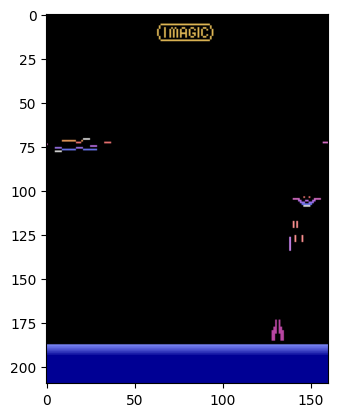

In [4]:
env = gym.make('ALE/DemonAttack-v5', render_mode='rgb_array')
eval_env = gym.make('ALE/DemonAttack-v5')
env.reset()
plt.imshow(env.render())

In [5]:
env.action_space.__dict__.keys()

dict_keys(['n', 'start', '_shape', 'dtype', '_np_random'])

In [6]:
(60, *env.observation_space._shape)

(60, 210, 160, 3)

# Replay Buffer

Create a replay buffer to hold game history

In [7]:
class ReplayBuffer:

    def __init__(self, max_size: int, observation_space: gym.spaces.Space, action_space: gym.spaces.Space, seed: int | None = None):
        """Stores the replay history with a maximum of `max_size` entries, removing old entries as needed.

        Parameters:
            max_size: maximal number of entries to keep
            observation_space: specification of the observation space
            action_space: specification of the action space
            seed: seed to initialize the internal random number generator for reproducibility"""
        self.max_size = max_size
        self.observation_space = observation_space
        self.action_space = action_space
        self.seed = seed
        self.rng = np.random.default_rng(seed=seed)
        
        self.current_state = np.zeros((max_size, *observation_space.shape))
        
        self.action = np.zeros(max_size, dtype=int)
        self.reward = np.zeros(max_size)
        self.next_state = np.zeros_like(self.current_state)
        self.done = np.zeros(max_size)
        
        self.step = 0
        self.len = 0
        
    def add(self, current_observation: np.ndarray, action: int, reward: float, next_observation: np.ndarray, done: bool) -> None:
        """Add a new entry to the buffer.

        Parameters:
            current_observation: environment state observed at the current step
            action: action taken by the model
            reward: reward received after taking the action
            next_observation: environment state obversed after taking the action
            done: whether the episode has ended or not"""
        self.current_state[self.step] = current_observation
        self.action[self.step] = action
        self.reward[self.step] = reward
        self.next_state[self.step] = next_observation
        self.done[self.step] = done
        self.step = (self.step + 1) % self.max_size
        self.len = min(self.len + 1, self.max_size)
        
    def sample(self, n_samples: int, replace: bool = True) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
        """Randomly samples `n_samples` from the buffer.

        Parameters:
            n_samples: number of samples to select
            replace: sample with or without replacement

        Returns:
            current observations, actions, rewards, next observations, done"""
        indicies = self.rng.choice(self.len, size=n_samples)
        return (
            self.current_state[indicies], 
            self.action[indicies], 
            self.reward[indicies], 
            self.next_state[indicies], 
            self.done[indicies]
        )

    def clear(self) -> None:
        """Clears the buffer"""
        self.step = self.len = 0

    def __getitem__(self, index: int) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
        """Gets a sample at `index`

        Parameters:
            index: index of the sample to get

        Returns:
            current observation, action, reward, next observation, done"""
        return (
            self.current_state[index], 
            self.action[index], 
            self.reward[index], 
            self.next_state[index], 
            self.done[index]
        )
        
    def __len__(self) -> int:
        """Returns the number of entries in the buffer"""
        return self.len

# Model

Implement your model. Most if not all ATARI environments have an image observation

In [8]:
def get_name(prefix: str | None = None, suffix: str | None = None, separator: str = '_') -> str | None:
    if prefix is None:
        return suffix
    return prefix and prefix + separator + suffix or suffix or None

In [9]:
def convBlock(filters: int, filter_size: int, inputs, number: int):
    local = tf.keras.layers.Conv2D(filters, filter_size, padding="same", kernel_initializer="he_normal", 
                                           kernel_regularizer=l2(1e-4), name=get_name(suffix=f'conv_bloc_{number}'))(inputs)
    local = tf.keras.layers.PReLU()(local)
    local = tf.keras.layers.BatchNormalization()(local)
    return local

In [10]:
def get_model(
    input_features: tuple, 
    out_features: int,
    blocks: int, 
    activation: str | tf.keras.layers.Activation | None = 'silu',
    dropout: float = 0.,
    kernel_num: int = 8,
    multiply_freq: int = 2,
    name: str | None = None
) -> tf.keras.Model:
    inputs = x = tf.keras.layers.Input(input_features, name=get_name(name, 'input'))

    for i in range(blocks):
        # position, velocity, angle, angle velocity
        x = convBlock(kernel_num, 3, x, i)
        x = tf.keras.layers.MaxPooling2D()(x)
        if dropout > 0:
            x = tf.keras.layers.Dropout(dropout, name=get_name(name, f'dropout_{i}'))(x)

        if multiply_freq > 0 and (i + 1) % multiply_freq == 0:
            kernel_num *= 2

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(out_features, name=get_name(name, 'prediction'))(x)
    
    return tf.keras.Model(inputs=inputs, outputs=x, name=name)

In [11]:
model = get_model(env.observation_space._shape, out_features=env.action_space.n, blocks=5, name="my_model", dropout=0.1, activation='swish', multiply_freq=2)
model.summary()
target_model = get_model(env.observation_space._shape, out_features=env.action_space.n, blocks=5, name="my_model", dropout=0.1, activation='swish', multiply_freq=2)

2024-05-02 03:02:17.092874: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-02 03:02:17.093044: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-02 03:02:17.093109: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_model_input (InputLayer)     │ (None, 210, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_bloc_0 (Conv2D)            │ (None, 210, 160, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu (PReLU)                 │ (None, 210, 160, 8)    │       268,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 210, 160, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 105, 80, 8)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_model_dropout_0 (Dropout)    │ (None, 105, 80, 8)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_bloc_1 (Conv2D)            │ (None, 105, 80, 8)     │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_1 (PReLU)               │ (None, 105, 80, 8)     │        67,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 105, 80, 8)     │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 52, 40, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_model_dropout_1 (Dropout)    │ (None, 52, 40, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_bloc_2 (Conv2D)            │ (None, 52, 40, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_2 (PReLU)               │ (None, 52, 40, 16)     │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 40, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 20, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_model_dropout_2 (Dropout)    │ (None, 26, 20, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_bloc_3 (Conv2D)            │ (None, 26, 20, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_3 (PReLU)               │ (None, 26, 20, 16)     │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 26, 20, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 10, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_model_dropout_3 (Dropout)    │ (None, 13, 10, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_bloc_4 (Conv2D)            │ (None, 13, 10, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_4 (PReLU)               │ (None, 13, 10, 32)     │         4,16

 Total params: 391,214 (1.49 MB)

 Trainable params: 391,054 (1.49 MB)

 Non-trainable params: 160 (640.00 B)

In [12]:
env.action_space.n

6

# Sampler

Implement the sampler

In [13]:
class Sampler:
    
    def __init__(self, epsilon: float, seed: int | None = None):
        """Selects a random action with probability `epsilon` otherwise selects the most probably action given by the model.

        Parameters:
            epsilon: the probability to select a random action
            seed: seed to initialize the internal random number generator for reproducibility"""
        self.rng = np.random.default_rng(seed=seed)
        self.epsilon = epsilon
        
    def __call__(self, probabilities: np.ndarray) -> int:
        """Select an action given the `probabilities

        Parameters:
            probabilities: probabilities for each action

        Returns:
            index of the selected action"""
        if self.rng.random() < self.epsilon:
            return self.rng.integers(probabilities.shape[0])
        return np.argmax(probabilities)

# Play the game

Implement interacting with the environment and storing entries to the replay buffer

In [14]:
def play_game(model: tf.keras.Model, buffer: ReplayBuffer | None, env: gym.Env, max_steps: int, sampler: Sampler, observation: np.ndarray | None = None, isEvaluate: bool = False) -> np.ndarray:
    """Play game and record

    Parameters:
        model: the model to get actions with
        buffer: replay buffer to store the entries to
        env: environment to play
        max_steps: maximal number of steps to perform
        sampler: sampler to use to sample actions
        observation: the observation to resume from

    Returns:
        the last observation"""
    if observation is None:
        observation, _ = env.reset()

    buffer = buffer if buffer is not None else ReplayBuffer(1) # cannot do or

    for i in range(max_steps):
        a = sampler(model(observation[None], training=False).numpy()[0])
        n_observations, score, done, terminated, _ = env.step(a)
        buffer.add(observation, a, score, n_observations, done)
        if done or terminated:
            if isEvaluate:
                return
            observation, _ = env.reset()
            continue
        observation = n_observations
    return observation

# Loss

Implement double q learning loss

In [15]:
def qq_loss(
    current_observation: tf.Tensor, 
    action: tf.Tensor, 
    reward: tf.Tensor, 
    next_observation: tf.Tensor, 
    done: tf.Tensor,
    model: tf.keras.Model,
    target_model: tf.keras.Model,
    gamma: float
) -> tf.Tensor:
    """Computes double q learning loss.

    Parameters:
        current_observation: observations at the current time step
        action: actions taken at the current time step
        reward: rewards at the current time step
        next_observation: observations at the next time step
        done: whether the episode has ended or not
        model: trainig model
        target_model: target model
        gamme: discount

    Returns:
        Computed loss"""
    q_current = model(current_observation)
    q_next = target_model(next_observation)

    a_next = tf.argmax(model(next_observation), axis=-1)
    
    # q_ref = tf.stop_gradient(reward + gamma * tf.reshape(tf.gather(q_next, tf.expand_dims(a_next, axis=-1), batch_dims=1), (-1, )) * (1. - done))
    q_ref = reward + gamma * tf.reshape(tf.gather(q_next, tf.expand_dims(a_next, axis=-1), batch_dims=1), (-1, )) * (1. - done)
    
    q = tf.reshape(tf.gather(q_current, tf.expand_dims(action, axis=-1), batch_dims=1), (-1, ))

    return tf.math.reduce_mean(tf.square(q_ref - q))

# Training

Create models, replay buffers, sampler, optimizer, epsilon decay etc. Implement training loop, show training progress and perform model evaluation once in a while

In [16]:
target_model.trainable = False
target_model.set_weights(model.get_weights())

In [17]:
train_buffer = ReplayBuffer(100, observation_space=env.observation_space, action_space=env.action_space)
train_sampler = Sampler(1)

In [18]:
eval_buffer = ReplayBuffer(100, observation_space=env.observation_space, action_space=env.action_space)
eval_sampler = Sampler(0)

In [19]:
optimizer = tf.keras.optimizers.Adam(1e-4, clipnorm=5, weight_decay=2e-5)

In [20]:
epochs = 20 ** 3
batch_size = 16
decay_epochs = epochs // 2
end_epsilon = 0.1
update_frequency = 225
eval_frequency = 225
steps_per_epoch = 16
eval_steps = 100
initial_samples = 1000
n_evals = 5
eval_threshold = 200

In [21]:
epsilon_decay = tf.keras.optimizers.schedules.PolynomialDecay(1., decay_epochs, end_learning_rate=end_epsilon)

In [27]:
losses = []
total_loss = 0
eval_score = 0

model.save_weights('test.weights.h5')
s, _ = env.reset()
pbar = tqdm.trange(epochs)
for i in pbar:
    print(f'{i} iteration')
    train_sampler.epsilon = epsilon_decay(i).numpy()
    
    s = play_game(model, train_buffer, env, steps_per_epoch, train_sampler, observation=s)

    model_weights = [v.value for v in model.trainable_weights]
    
    vals = train_buffer.sample(batch_size)
    with tf.GradientTape(watch_accessed_variables=False) as g:
        g.watch(model_weights)
        loss = qq_loss(*vals, model, target_model, 0.99)

    gradient = g.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradient, model.trainable_weights))
    
    losses.append(loss.numpy())
    total_loss += losses[-1]

    if (i + 1) % update_frequency == 0:
        target_model.set_weights(model.get_weights())

    if (i + 1) % eval_frequency == 0:
        eval_score = 0

        for i in range(n_evals):
            eval_buffer.clear()
            play_game(model, eval_buffer, eval_env, eval_steps, eval_sampler, isEvaluate=True)
            eval_score += eval_buffer.reward[:len(eval_buffer)].sum()

        eval_score /= n_evals
        if eval_score >= eval_threshold:
            break

    pbar.set_description(f'L: {losses[-1]:.5f}; AL: {total_loss / (i + 1):.5f}; E: {eval_score:.5f}')
model.save('result_checkpoint.keras')

  0%|          | 0/8000 [00:00<?, ?it/s]

0 iteration
1 iteration
2 iteration
3 iteration
4 iteration
5 iteration
6 iteration
7 iteration
8 iteration
9 iteration
10 iteration
11 iteration
12 iteration
13 iteration
14 iteration
15 iteration
16 iteration
17 iteration
18 iteration
19 iteration
20 iteration
21 iteration
22 iteration
23 iteration
24 iteration
25 iteration
26 iteration
27 iteration
28 iteration
29 iteration
30 iteration
31 iteration
32 iteration
33 iteration
34 iteration
35 iteration
36 iteration
37 iteration
38 iteration
39 iteration
40 iteration
41 iteration
42 iteration
43 iteration
44 iteration
45 iteration
46 iteration
47 iteration
48 iteration
49 iteration
50 iteration
51 iteration
52 iteration
53 iteration
54 iteration
55 iteration
56 iteration
57 iteration
58 iteration
59 iteration
60 iteration
61 iteration
62 iteration
63 iteration
64 iteration
65 iteration
66 iteration
67 iteration
68 iteration
69 iteration
70 iteration
71 iteration
72 iteration
73 iteration
74 iteration
75 iteration
76 iteration
77 iterat

In [28]:
def save_gameplay(model: tf.keras.Model, render_mode: str = 'human'):
    env = gym.make('ALE/DemonAttack-v5', render_mode=render_mode)
    buffer = ReplayBuffer(1000, env.observation_space, env.action_space)
    play_game(model, buffer, env, 1000, Sampler(0), isEvaluate=True)
    render = env.render()
    # gym.utils.save_video.save_video(render, 'videos', durations=[1] * len(render))
    return render, buffer

In [ ]:
a, b = save_gameplay(model)

In [ ]:
b.reward.sum()

# Testing

Test the model on the environment and get a cool video